# Q1
The chart shows the household income distribution of the families living in three different neighbourhoods, A, B and C.
Discuss and compare these neighbourhoods using the data available.

## Step 1 - Importing relevant libraries 

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

C:\Users\gabws\AppData\Local\Temp\ipykernel_4248\976333922.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## Step 2 - Importing dataset 

In [3]:
dataset = pd.read_csv("Q1.csv")

In [4]:
dataset.head()

,Unnamed: 0,0-1999,2000-2999,3000-3999,4000-4999,5000-5999,6000-6999,7000-7999,8000-8999,9000-9999,10000-10999,11000-11999,12000-12999,13000-13999,14000-14999,>= 15000
0,A,0.0329,0.079916,0.173031,0.139009,0.113150,0.098731,0.076331,0.055649,0.05136,0.041871,0.034666,0.016490,0.016803,0.015846,0.054248
1,B,0.0929,0.122831,0.156868,0.142180,0.102218,0.090620,0.061402,0.054590,0.03275,0.029134,0.021937,0.012768,0.012383,0.011242,0.056177
2,C,0.0170,0.035000,0.094000,0.121800,0.114400,0.095200,0.082300,0.069400,0.06310,0.048800,0.042700,0.034000,0.027400,0.020100,0.134800


In [5]:
dataset.rename(columns={'Unnamed: 0': 'Neighbourhood'}, inplace = True)

In [6]:
dataset.head()

,Neighbourhood,0-1999,2000-2999,3000-3999,4000-4999,5000-5999,6000-6999,7000-7999,8000-8999,9000-9999,10000-10999,11000-11999,12000-12999,13000-13999,14000-14999,>= 15000
0,A,0.0329,0.079916,0.173031,0.139009,0.113150,0.098731,0.076331,0.055649,0.05136,0.041871,0.034666,0.016490,0.016803,0.015846,0.054248
1,B,0.0929,0.122831,0.156868,0.142180,0.102218,0.090620,0.061402,0.054590,0.03275,0.029134,0.021937,0.012768,0.012383,0.011242,0.056177
2,C,0.0170,0.035000,0.094000,0.121800,0.114400,0.095200,0.082300,0.069400,0.06310,0.048800,0.042700,0.034000,0.027400,0.020100,0.134800


In [7]:
#check data types with column, does it match? if yes, then no issue
#check for any null data

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Neighbourhood  3 non-null      object 
 1   0-1999         3 non-null      float64
 2   2000-2999      3 non-null      float64
 3   3000-3999      3 non-null      float64
 4   4000-4999      3 non-null      float64
 5   5000-5999      3 non-null      float64
 6   6000-6999      3 non-null      float64
 7   7000-7999      3 non-null      float64
 8   8000-8999      3 non-null      float64
 9   9000-9999      3 non-null      float64
 10  10000-10999    3 non-null      float64
 11  11000-11999    3 non-null      float64
 12  12000-12999    3 non-null      float64
 13  13000-13999    3 non-null      float64
 14  14000-14999    3 non-null      float64
 15  >= 15000       3 non-null      float64
dtypes: float64(15), object(1)
memory usage: 512.0+ bytes


# Initial thoughts on dataset
- Dataset looks to have a visible trend where for all neighbourhoods A,B and C has a higher residency rate within the income range of 3000 to 5999.

- Need to assume the population for each neighbourhood to be able to convert % into numbers

## Step 3 - Assuming each neighbourhood has a population of 1000

In [8]:
dataset.iloc[:,1:] = dataset.iloc[:,1:]*1000

In [9]:
dataset.head()

,Neighbourhood,0-1999,2000-2999,3000-3999,4000-4999,5000-5999,6000-6999,7000-7999,8000-8999,9000-9999,10000-10999,11000-11999,12000-12999,13000-13999,14000-14999,>= 15000
0,A,32.9,79.915609,173.030549,139.00866,113.149718,98.731132,76.331008,55.649267,51.360074,41.870628,34.666346,16.489667,16.802925,15.846463,54.247954
1,B,92.9,122.830717,156.868113,142.18000,102.218011,90.619888,61.401861,54.590170,32.749783,29.134177,21.937412,12.767546,12.383336,11.241773,56.177215
2,C,17.0,35.000000,94.000000,121.80000,114.400000,95.200000,82.300000,69.400000,63.100000,48.800000,42.700000,34.000000,27.400000,20.100000,134.800000


In [10]:
#converting dataset to int instead of float, not realistic to have float populations

dataset.iloc[:,1:] = dataset.iloc[:,1:].astype(int)

In [11]:
dataset.head()

,Neighbourhood,0-1999,2000-2999,3000-3999,4000-4999,5000-5999,6000-6999,7000-7999,8000-8999,9000-9999,10000-10999,11000-11999,12000-12999,13000-13999,14000-14999,>= 15000
0,A,32,79,173,139,113,98,76,55,51,41,34,16,16,15,54
1,B,92,122,156,142,102,90,61,54,32,29,21,12,12,11,56
2,C,17,35,94,121,114,95,82,69,63,48,42,34,27,20,134


In [12]:
median = dataset.iloc[[0,1,2]].median(axis=1)
print (median)

0    54.0
1    56.0
2    63.0
dtype: float64


C:\Users\gabws\AppData\Local\Temp\ipykernel_4248\1764193889.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median = dataset.iloc[[0,1,2]].median(axis=1)


In [13]:
mean = dataset.iloc[[0,1,2]].mean(axis=1)
print (mean)

0    66.133333
1    66.133333
2    66.333333
dtype: float64


C:\Users\gabws\AppData\Local\Temp\ipykernel_4248\3624588584.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = dataset.iloc[[0,1,2]].mean(axis=1)


In [14]:
std = dataset.iloc[[0,1,2]].std(axis=1)
print (std)

0    47.189385
1    48.723515
2    38.520248
dtype: float64


C:\Users\gabws\AppData\Local\Temp\ipykernel_4248\4154897625.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = dataset.iloc[[0,1,2]].std(axis=1)


# Step 4 - Visualization of Data

<Figure size 1152x288 with 0 Axes>

<AxesSubplot:ylabel='Neighbourhood'>

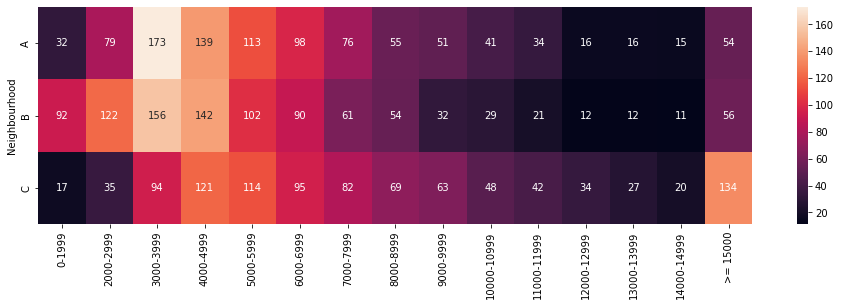

In [15]:
df = dataset.set_index("Neighbourhood")
plt.figure(figsize=(16,4))
sns.heatmap(df,annot=True,fmt="d")
plt.show()

# Thoughts on heatmap
- Similar to our initial thoughts, heatmap is brightest at 3000-5999. 

- Neighbourhood C looks to be of a 'higher end' neighbourhood with majority of the higher waged income residents staying as seen of the heatmap


# Q2 
Choose three buildings and compare amongst them based on the price trend chart and the raw data available in the "Q2 data" worksheet.


In [16]:
#df = df[(df['Frequency'] == 0.8) | (df['Frequency'] == 0.6)]

Q2 = pd.read_csv("Q2.csv")
Q2

,Id,Property building category,Property building type,Title,Built up price psf,Size built up,Valuation price,YEAR,QUARTER,NAME,Year completion,Property building category.1,Property building type.1
0,464152,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,981,905,888200,2015,20152,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT
1,464156,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,1050,905,950000,2015,20152,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT
2,464157,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,892,367,327500,2014,20142,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT
3,464158,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,1062,356,377900,2014,20144,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT
4,469885,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,1059,841,890900,2014,20144,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,838224,HIGHRISE,CONDO,RESIDENTIAL,404,2485,1004000,2019,20191,RAINBOW APARTMENT,1987,HIGHRISE,CONDO
247,463159,HIGHRISE,CONDO,RESIDENTIAL,514,2733,1404000,2015,20153,RAINBOW APARTMENT,1987,HIGHRISE,CONDO
248,558463,HIGHRISE,CONDO,RESIDENTIAL,416,2733,1136000,2017,20173,RAINBOW APARTMENT,1987,HIGHRISE,CONDO
249,519187,HIGHRISE,CONDO,RESIDENTIAL,770,2755,2120000,2016,20161,RAINBOW APARTMENT,1987,HIGHRISE,CONDO


In [17]:
three_buildings = ["ASTRA SUITES", "HARBOURVIEW", "RAINBOW APARTMENT"]
Q2new = Q2[Q2.NAME.isin (three_buildings)]
Q2new.sample(10)

,Id,Property building category,Property building type,Title,Built up price psf,Size built up,Valuation price,YEAR,QUARTER,NAME,Year completion,Property building category.1,Property building type.1
41,756867,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,373,367,137000,2006,20062,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT
44,756870,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,1022,367,375000,2018,20181,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT
23,654941,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,1024,367,375800,2017,20174,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT
248,558463,HIGHRISE,CONDO,RESIDENTIAL,416,2733,1136000,2017,20173,RAINBOW APARTMENT,1987,HIGHRISE,CONDO
1,464156,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,1050,905,950000,2015,20152,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT
8,482530,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,1000,410,409900,2016,20164,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT
249,519187,HIGHRISE,CONDO,RESIDENTIAL,770,2755,2120000,2016,20161,RAINBOW APARTMENT,1987,HIGHRISE,CONDO
70,801281,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,840,905,760000,2018,20183,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT
125,716288,HIGHRISE,CONDO,RESIDENTIAL,1311,1755,2300000,2018,20182,HARBOURVIEW,1994,HIGHRISE,CONDO
244,467494,HIGHRISE,CONDO,RESIDENTIAL,741,2485,1841000,2015,20152,RAINBOW APARTMENT,1987,HIGHRISE,CONDO


In [21]:
#dropping columns that are repetitive

Q2new = Q2new.drop(['Property building category.1','Property building type.1'], axis=1)
Q2new.sample(5)

,Id,Property building category,Property building type,Title,Built up price psf,Size built up,Valuation price,YEAR,QUARTER,NAME,Year completion
116,505433,HIGHRISE,CONDO,RESIDENTIAL,1026,1389,1425000,2016,20161,HARBOURVIEW,1994
105,463184,HIGHRISE,CONDO,RESIDENTIAL,1026,1755,1800000,2015,20152,HARBOURVIEW,1994
78,849642,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,1022,367,375000,2016,20162,ASTRA SUITES,2004
75,838841,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,945,905,855000,2018,20183,ASTRA SUITES,2004
28,711784,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,441,356,157000,2005,20051,ASTRA SUITES,2004


In [22]:
#checking for null and duplicated data

Q2new.isnull().sum()
Q2new.duplicated().sum()

Id                            0
Property building category    0
Property building type        0
Title                         0
Built up price psf            0
Size built up                 0
Valuation price               0
YEAR                          0
QUARTER                       0
NAME                          0
Year completion               0
dtype: int64

0

In [20]:
Q2_1 = pd.read_csv("Q2 average price.csv")
Q2_1

,NAME,20161,20162,20163,20164,20171,20172,20173,20174,20181,20182,20183,20184,20191,20192
0,ASTRA SUITES,989,"1,011","1,016",981,"1,024",NaN,"1,084","1,038",998,885,964,"1,455",NaN,NaN
1,FLAT JALAN AMAN,273,241,189,273,NaN,NaN,228,176,NaN,NaN,NaN,241,209.0,160.0
2,HARBOURVIEW,"1,104","1,117","1,005","1,162",NaN,"1,066",NaN,NaN,"1,221","1,267","1,332",NaN,NaN,NaN
3,LILY POINT,552,515,520,585,507,474,456,471,614,470,441,418,NaN,NaN
4,RAINBOW APARTMENT,770,NaN,736,892,357,NaN,416,724,826,NaN,882,740,404.0,NaN


In [24]:
Q2new

,Id,Property building category,Property building type,Title,Built up price psf,Size built up,Valuation price,YEAR,QUARTER,NAME,Year completion
0,464152,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,981,905,888200,2015,20152,ASTRA SUITES,2004
1,464156,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,1050,905,950000,2015,20152,ASTRA SUITES,2004
2,464157,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,892,367,327500,2014,20142,ASTRA SUITES,2004
3,464158,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,1062,356,377900,2014,20144,ASTRA SUITES,2004
4,469885,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,1059,841,890900,2014,20144,ASTRA SUITES,2004
...,...,...,...,...,...,...,...,...,...,...,...
246,838224,HIGHRISE,CONDO,RESIDENTIAL,404,2485,1004000,2019,20191,RAINBOW APARTMENT,1987
247,463159,HIGHRISE,CONDO,RESIDENTIAL,514,2733,1404000,2015,20153,RAINBOW APARTMENT,1987
248,558463,HIGHRISE,CONDO,RESIDENTIAL,416,2733,1136000,2017,20173,RAINBOW APARTMENT,1987
249,519187,HIGHRISE,CONDO,RESIDENTIAL,770,2755,2120000,2016,20161,RAINBOW APARTMENT,1987


In [28]:
Q2new = Q2new[['QUARTER', 'NAME', 'Built up price psf']]
Q2new.sort_values("QUARTER")
Q2new

,QUARTER,NAME,Built up price psf
64,20044,ASTRA SUITES,404
32,20044,ASTRA SUITES,424
27,20044,ASTRA SUITES,387
26,20044,ASTRA SUITES,435
43,20044,ASTRA SUITES,392
...,...,...,...
70,20183,ASTRA SUITES,840
242,20184,RAINBOW APARTMENT,826
243,20184,RAINBOW APARTMENT,654
66,20184,ASTRA SUITES,1455


,QUARTER,NAME,Built up price psf
0,20152,ASTRA SUITES,981
1,20152,ASTRA SUITES,1050
2,20142,ASTRA SUITES,892
3,20144,ASTRA SUITES,1062
4,20144,ASTRA SUITES,1059
...,...,...,...
246,20191,RAINBOW APARTMENT,404
247,20153,RAINBOW APARTMENT,514
248,20173,RAINBOW APARTMENT,416
249,20161,RAINBOW APARTMENT,770


<AxesSubplot:xlabel='QUARTER', ylabel='Built up price psf'>

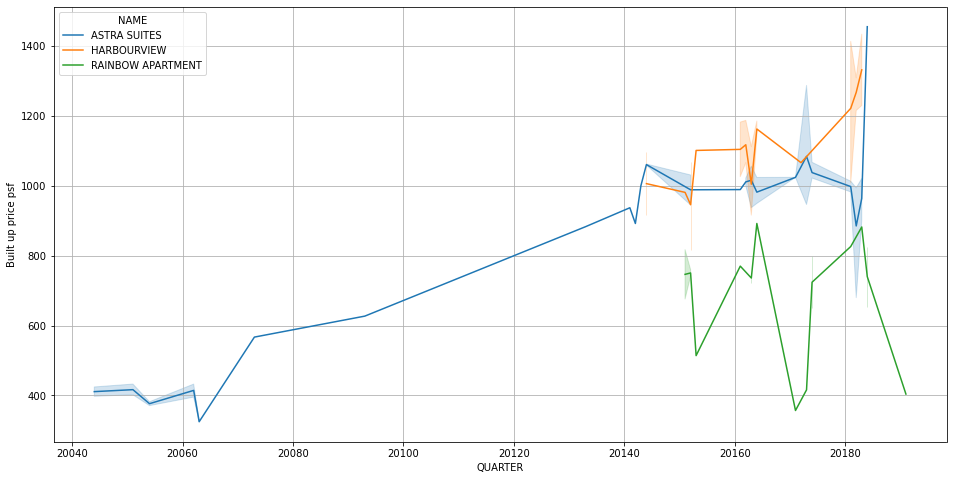

In [42]:
fig, ax =plt.subplots(figsize=(16,8))
plt.grid()
sns.lineplot(data=Q2new, x="QUARTER", y="Built up price psf",hue="NAME")

# Interpretation
It is clear that the average PSF Price for ASTRA SUITES and HARBOURVIEW has been steadily rising over time. Looking at RAINBOW APARTMENT POINT it would like a very bad property to invest in.